In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
data = pd.read_csv('Data/historical_DOGEUSDT_3min_data.csv')

In [3]:
data

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1598918400000,0.003206,0.003213,0.003205,0.003212,1737970.0,1598918579999,5580.807473,23,878471.0,2820.579582,0
1,1598918580000,0.003207,0.003207,0.003200,0.003201,1124509.0,1598918759999,3601.947301,23,507289.0,1625.205843,0
2,1598918760000,0.003200,0.003201,0.003190,0.003197,4517437.0,1598918939999,14440.856434,82,1194056.0,3818.394074,0
3,1598918940000,0.003199,0.003199,0.003190,0.003199,1799867.0,1598919119999,5752.475020,38,830740.0,2655.099639,0
4,1598919120000,0.003195,0.003195,0.003194,0.003194,174555.0,1598919299999,557.627329,4,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
583676,1704066480000,0.089340,0.089510,0.089340,0.089460,5121411.0,1704066659999,458109.322890,521,2550835.0,228116.020890,0
583677,1704066660000,0.089450,0.089480,0.089400,0.089440,903496.0,1704066839999,80803.426110,128,483316.0,43226.492480,0
583678,1704066840000,0.089450,0.089540,0.089420,0.089530,639110.0,1704067019999,57179.473120,159,464231.0,41531.905370,0
583679,1704067020000,0.089530,0.089570,0.089530,0.089550,563692.0,1704067199999,50484.383450,137,236351.0,21167.129060,0


In [4]:
def find_threshold_crossing(df, start_index, percent):
    # Ensure the start_index is valid
    if start_index >= len(df):
        return None, None

    # Getting the open price at the start index
    open_price = df.loc[start_index, 'Open']

    # Calculating the thresholds
    threshold_up = open_price * (1 + percent/100)
    threshold_down = open_price * (1 - percent/100)

    # Variables to store the number of candles it took to cross each threshold
    up_cross = None
    down_cross = None

    # Calculate the maximum number of candles for 7 days
    max_candles = 7 * 24 * 20

    # Iterate through the dataframe starting from the start index
    for index, row in df.loc[start_index:].iterrows():
        if index - start_index > max_candles:
            # Stop if 7 days have passed without crossing either threshold
            break

        if up_cross is None and row['High'] >= threshold_up:
            up_cross = index - start_index

        if down_cross is None and row['Low'] <= threshold_down:
            down_cross = index - start_index

    return up_cross, down_cross

In [5]:
df = data
start_index = 0
result = find_threshold_crossing(df=df, start_index=0, percent=1)
print(result)

(115, 7)


In [6]:
# output = []

# for i in range(len(df)):
#     up_cross, down_cross = find_threshold_crossing(df=df, start_index=0, percent=1)
#     output.append([up_cross, down_cross])

#     if i%1 == 0:
#         print(f'{i}/{len(df)} processing...')


In [7]:
threshold_data = pd.read_csv('Data/up_down_cross_3min_data.csv')

In [8]:
threshold_data

,up_cross,down_cross
0,115.0,7.0
1,114.0,6.0
2,34.0,6.0
3,33.0,5.0
4,26.0,4.0
...,...,...
583676,NaN,NaN
583677,NaN,NaN
583678,NaN,NaN
583679,NaN,NaN


In [9]:
print(len(threshold_data))

583681


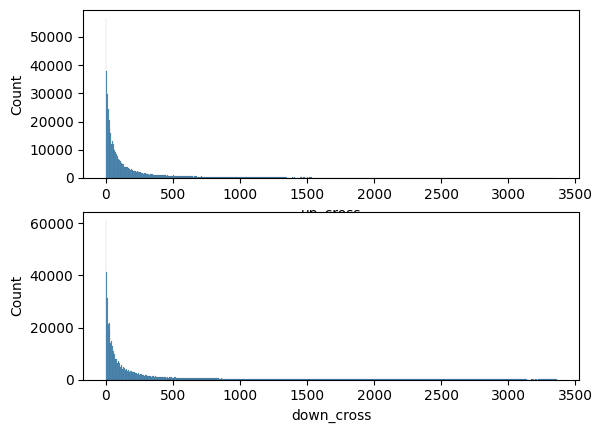

In [10]:
plt.subplot(2,1,1)
sns.histplot(threshold_data['up_cross'])

plt.subplot(2,1,2)
sns.histplot(threshold_data['down_cross'])

plt.show()

In [11]:
threshold_data.isna().sum()/len(threshold_data)*100

up_cross      10.261941
down_cross     7.097541
dtype: float64

In [12]:
temp = threshold_data.fillna(3360)

In [13]:
# Create the 'minutes' column
temp['minutes'] = temp[['up_cross', 'down_cross']].min(axis=1)*3

# Create the 'side' column
temp['side'] = temp.apply(lambda row: 1 if row['up_cross'] < row['down_cross'] else (-1 if row['up_cross'] > row['down_cross'] else 0), axis=1)

# Creating a new DataFrame with just the 'minutes' and 'side' columns
one_percent_data = temp[['minutes', 'side']]


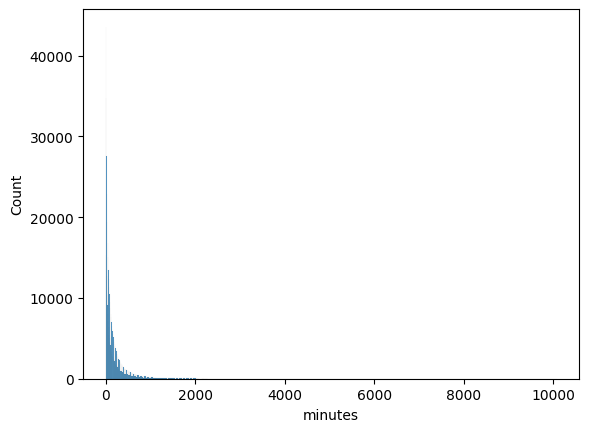

In [14]:
sns.histplot(one_percent_data['minutes'])
plt.show()

In [15]:
one_percent_data['minutes'].describe()

count    583681.000000
mean        197.170977
std         368.328302
min           0.000000
25%          27.000000
50%          81.000000
75%         219.000000
max       10080.000000
Name: minutes, dtype: float64

In [17]:
mean = one_percent_data['minutes'].mean()
median = one_percent_data['minutes'].median()
std_dev = one_percent_data['minutes'].std()
quartiles = one_percent_data['minutes'].quantile([0.25, 0.5, 0.75])

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"1st Quartile: {quartiles[0.25]}")
print(f"2nd Quartile (Median): {quartiles[0.5]}")
print(f"3rd Quartile: {quartiles[0.75]}")

Mean: 197.17097695487774
Median: 81.0
Standard Deviation: 368.3283020969982
1st Quartile: 27.0
2nd Quartile (Median): 81.0
3rd Quartile: 219.0


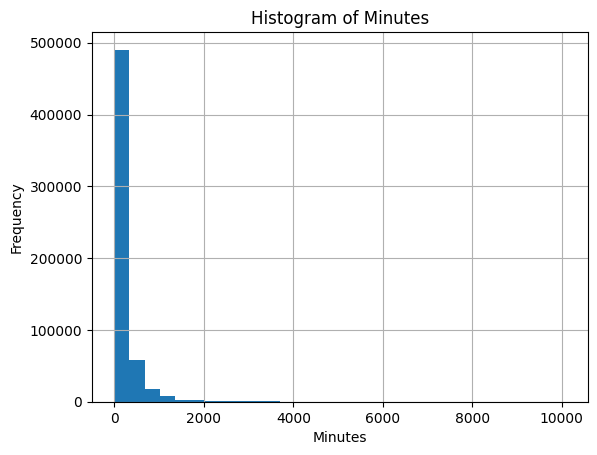

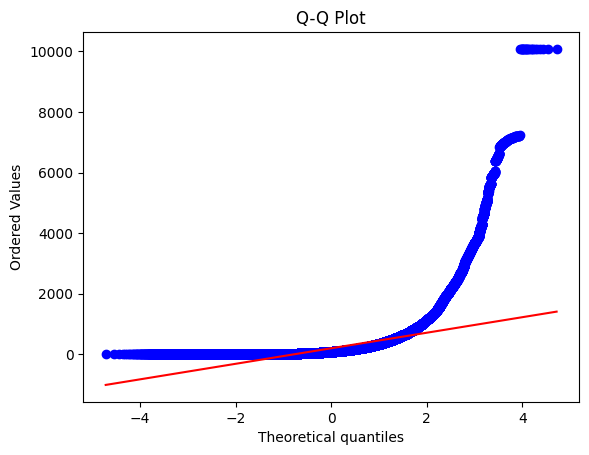

In [18]:
# Histogram
one_percent_data['minutes'].hist(bins=30)
plt.title('Histogram of Minutes')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
stats.probplot(one_percent_data['minutes'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

/var/folders/mj/m28wyfp54xbfc1pkqh5_b64r0000gn/T/ipykernel_25668/1886537575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_percent_data['log_minutes'] = np.log(one_percent_data['minutes'] + 1)  # Adding 1 to avoid log(0)


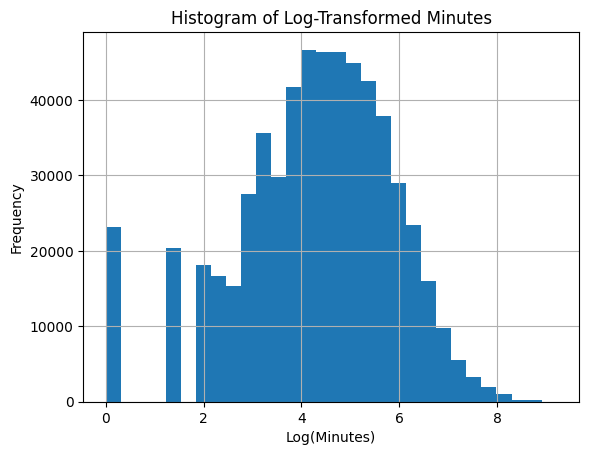

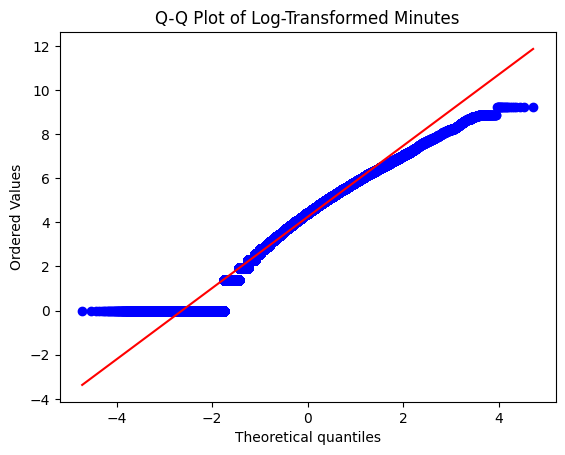

In [19]:
# Log Transformation
one_percent_data['log_minutes'] = np.log(one_percent_data['minutes'] + 1)  # Adding 1 to avoid log(0)

# Now, plot the histogram and Q-Q plot for the transformed data
one_percent_data['log_minutes'].hist(bins=30)
plt.title('Histogram of Log-Transformed Minutes')
plt.xlabel('Log(Minutes)')
plt.ylabel('Frequency')
plt.show()

stats.probplot(one_percent_data['log_minutes'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Minutes')
plt.show()

In [28]:
# remove the outliers
total_length = len(one_percent_data)
side_zeros = len(one_percent_data[one_percent_data['side']==0])
print(f'side = 0 values : {side_zeros/total_length*100}%\n')
more_than_a_day = one_percent_data[one_percent_data['minutes']>24*60]
print(f'took more than a day values : {len(more_than_a_day)/total_length*100}%')
more_than_12hours = one_percent_data[one_percent_data['minutes']>12*60]
print(f'took more than 12 hours values : {len(more_than_12hours)/total_length*100}%')
more_than_8hours = one_percent_data[one_percent_data['minutes']>8*60]
print(f'took more than 8 hours values : {len(more_than_8hours)/total_length*100}%')
more_than_6hours = one_percent_data[one_percent_data['minutes']>6*60]
print(f'took more than 6 hours values : {len(more_than_6hours)/total_length*100}%')
more_than_4hours = one_percent_data[one_percent_data['minutes']>4*60]
print(f'took more than 4 hours values : {len(more_than_4hours)/total_length*100}%')
more_than_3hours = one_percent_data[one_percent_data['minutes']>3*60]
print(f'took more than 3 hours values : {len(more_than_3hours)/total_length*100}%')
more_than_2half_hours = one_percent_data[one_percent_data['minutes']>2.5*60]
print(f'took more than 2.5 hours values : {len(more_than_2half_hours)/total_length*100}%')
more_than_2hours = one_percent_data[one_percent_data['minutes']>2*60]
print(f'took more than 2 hours values : {len(more_than_2hours)/total_length*100}%')

print('')

less_than_15minutes = one_percent_data[one_percent_data['minutes']<15]
print(f'took less than 15 minutes values : {len(less_than_15minutes)/total_length*100}%')
less_than_30minutes = one_percent_data[one_percent_data['minutes']<30]
print(f'took less than 30 minutes values : {len(less_than_30minutes)/total_length*100}%')
less_than_45minutes = one_percent_data[one_percent_data['minutes']<45]
print(f'took less than 45 minutes values : {len(less_than_45minutes)/total_length*100}%')
less_than_1hours = one_percent_data[one_percent_data['minutes']<60]
print(f'took less than 1 hour values : {len(less_than_1hours)/total_length*100}%')

side = 0 values : 0.32329303163885753%

took more than a day values : 1.372153625010922%
took more than 12 hours values : 5.221345221105364%
took more than 8 hours values : 10.084960791939434%
took more than 6 hours values : 14.587591509745906%
took more than 4 hours values : 22.83096417392377%
took more than 3 hours values : 29.6965294398824%
took more than 2.5 hours values : 34.28893522317841%
took more than 2 hours values : 40.0160361567363%

took less than 15 minutes values : 16.036328062760308%
took less than 30 minutes values : 26.863475083136162%
took less than 45 minutes values : 35.017244008285346%
took less than 1 hour values : 41.604575101810745%


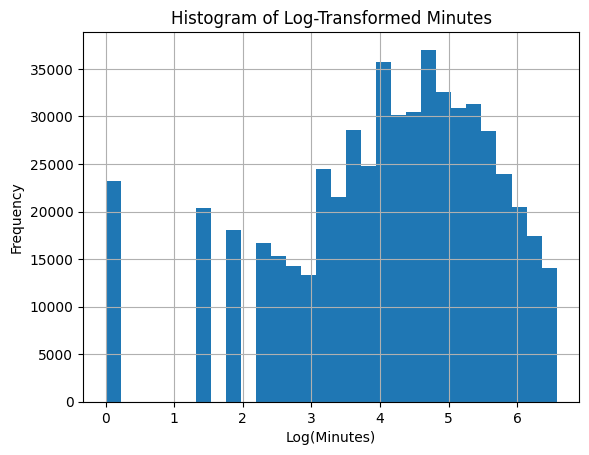

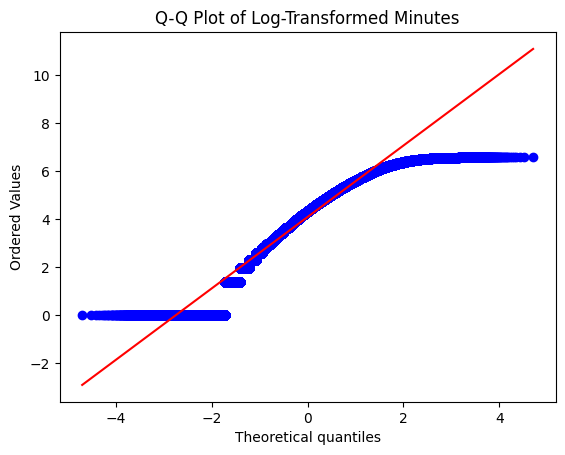

In [29]:
less_than_a_12hour = one_percent_data[one_percent_data['minutes']<12*60]

# Now, plot the histogram and Q-Q plot for the transformed data
less_than_a_12hour['log_minutes'].hist(bins=30)
plt.title('Histogram of Log-Transformed Minutes')
plt.xlabel('Log(Minutes)')
plt.ylabel('Frequency')
plt.show()

stats.probplot(less_than_a_12hour['log_minutes'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Minutes')
plt.show()

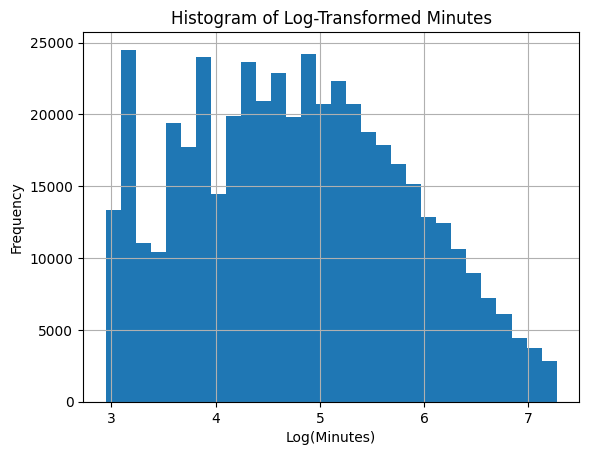

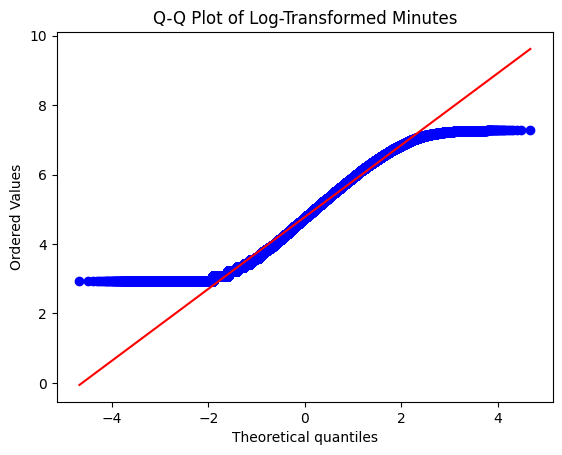

In [30]:
middle_values = one_percent_data[(one_percent_data['minutes']<24*60)&(one_percent_data['minutes']>15)]

# Now, plot the histogram and Q-Q plot for the transformed data
middle_values['log_minutes'].hist(bins=30)
plt.title('Histogram of Log-Transformed Minutes')
plt.xlabel('Log(Minutes)')
plt.ylabel('Frequency')
plt.show()

stats.probplot(middle_values['log_minutes'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Minutes')
plt.show()

In [31]:
np.e**2

7.3890560989306495

In [32]:
np.e**7

1096.6331584284583

In [33]:
less_than_2half_hours = one_percent_data[one_percent_data['minutes']<2.5*60]

less_than_2half_hours

,minutes,side,log_minutes
0,21.0,-1,3.091042
1,18.0,-1,2.944439
2,18.0,-1,2.944439
3,15.0,-1,2.772589
4,12.0,-1,2.564949
...,...,...,...
583654,9.0,-1,2.302585
583655,6.0,-1,1.945910
583656,3.0,-1,1.386294
583657,0.0,-1,0.000000


In [34]:
print(f'up cross : {len(less_than_2half_hours[less_than_2half_hours['side']>0])/total_length}')
print(f'down cross : {len(less_than_2half_hours[less_than_2half_hours['side']<0])/total_length}')

up cross : 0.3137655671505497
down cross : 0.33516766864091857


In [35]:
temp2 = one_percent_data.copy()
temp2['plus_6'] = ((temp2['minutes']<2.5*60)&(temp2['side']>0)).astype(int)
temp2['minus_6'] = ((temp2['minutes']<2.5*60)&(temp2['side']<0)).astype(int)
temp2['zero_6'] = ((temp2['minutes']>=2.5*60)|(temp2['side']==0)).astype(int)
data2 = temp2

In [36]:
df_all = pd.concat([data,threshold_data,data2],axis=1)
df_all

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,up_cross,down_cross,minutes,side,log_minutes,plus_6,minus_6,zero_6
0,1598918400000,0.003206,0.003213,0.003205,0.003212,1737970.0,1598918579999,5580.807473,23,878471.0,2820.579582,0,115.0,7.0,21.0,-1,3.091042,0,1,0
1,1598918580000,0.003207,0.003207,0.003200,0.003201,1124509.0,1598918759999,3601.947301,23,507289.0,1625.205843,0,114.0,6.0,18.0,-1,2.944439,0,1,0
2,1598918760000,0.003200,0.003201,0.003190,0.003197,4517437.0,1598918939999,14440.856434,82,1194056.0,3818.394074,0,34.0,6.0,18.0,-1,2.944439,0,1,0
3,1598918940000,0.003199,0.003199,0.003190,0.003199,1799867.0,1598919119999,5752.475020,38,830740.0,2655.099639,0,33.0,5.0,15.0,-1,2.772589,0,1,0
4,1598919120000,0.003195,0.003195,0.003194,0.003194,174555.0,1598919299999,557.627329,4,0.0,0.000000,0,26.0,4.0,12.0,-1,2.564949,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583676,1704066480000,0.089340,0.089510,0.089340,0.089460,5121411.0,1704066659999,458109.322890,521,2550835.0,228116.020890,0,NaN,NaN,10080.0,0,9.218408,0,0,1
583677,1704066660000,0.089450,0.089480,0.089400,0.089440,903496.0,1704066839999,80803.426110,128,483316.0,43226.492480,0,NaN,NaN,10080.0,0,9.218408,0,0,1
583678,1704066840000,0.089450,0.089540,0.089420,0.089530,639110.0,1704067019999,57179.473120,159,464231.0,41531.905370,0,NaN,NaN,10080.0,0,9.218408,0,0,1
583679,1704067020000,0.089530,0.089570,0.089530,0.089550,563692.0,1704067199999,50484.383450,137,236351.0,21167.129060,0,NaN,NaN,10080.0,0,9.218408,0,0,1


In [37]:
# Create a boolean series where True indicates the rows with the sum equal to 1
rows_with_sum_one = (df_all['plus_6'] + df_all['minus_6'] + df_all['zero_6']) == 1

# Check if all values in the boolean series are True
all_rows_sum_to_one = rows_with_sum_one.all()

print(f"All rows have a sum of 1: {all_rows_sum_to_one}")


All rows have a sum of 1: True


In [38]:
df_all.to_csv('Data/df_all.csv', index=False)

In [39]:
temp3 = pd.read_csv('Data/df_all.csv')
temp3

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,up_cross,down_cross,minutes,side,log_minutes,plus_6,minus_6,zero_6
0,1598918400000,0.003206,0.003213,0.003205,0.003212,1737970.0,1598918579999,5580.807473,23,878471.0,2820.579582,0,115.0,7.0,21.0,-1,3.091042,0,1,0
1,1598918580000,0.003207,0.003207,0.003200,0.003201,1124509.0,1598918759999,3601.947301,23,507289.0,1625.205843,0,114.0,6.0,18.0,-1,2.944439,0,1,0
2,1598918760000,0.003200,0.003201,0.003190,0.003197,4517437.0,1598918939999,14440.856434,82,1194056.0,3818.394074,0,34.0,6.0,18.0,-1,2.944439,0,1,0
3,1598918940000,0.003199,0.003199,0.003190,0.003199,1799867.0,1598919119999,5752.475020,38,830740.0,2655.099639,0,33.0,5.0,15.0,-1,2.772589,0,1,0
4,1598919120000,0.003195,0.003195,0.003194,0.003194,174555.0,1598919299999,557.627329,4,0.0,0.000000,0,26.0,4.0,12.0,-1,2.564949,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583676,1704066480000,0.089340,0.089510,0.089340,0.089460,5121411.0,1704066659999,458109.322890,521,2550835.0,228116.020890,0,NaN,NaN,10080.0,0,9.218408,0,0,1
583677,1704066660000,0.089450,0.089480,0.089400,0.089440,903496.0,1704066839999,80803.426110,128,483316.0,43226.492480,0,NaN,NaN,10080.0,0,9.218408,0,0,1
583678,1704066840000,0.089450,0.089540,0.089420,0.089530,639110.0,1704067019999,57179.473120,159,464231.0,41531.905370,0,NaN,NaN,10080.0,0,9.218408,0,0,1
583679,1704067020000,0.089530,0.089570,0.089530,0.089550,563692.0,1704067199999,50484.383450,137,236351.0,21167.129060,0,NaN,NaN,10080.0,0,9.218408,0,0,1
